In [19]:

from tensorflow.keras.datasets import mnist
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = mnist.load_data()
     

In [20]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [22]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


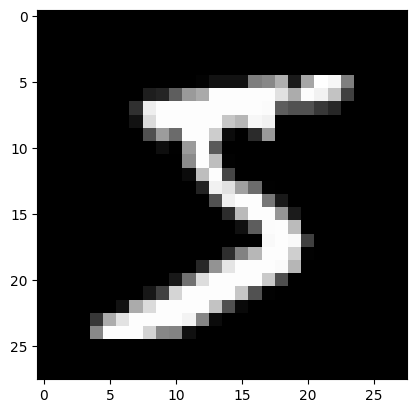

In [23]:
# colormap: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse: _r
import pandas as pd
import matplotlib.pyplot as plt

# 灰階圖片(0: 黑色 255: 白色)
pd.DataFrame(x_train[0])
plt.imshow(x_train[0], cmap="gray")

In [24]:
# models(地基): Sequential(一層疊一層) Model(自由疊層)
# layers: Dense(全連接層)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias)
    Dense(128, activation="relu", input_dim=784),#表示我们期望将一个 784 维的特征向量输入到模型中。这个数字对应于 MNIST 数据集中的图像，每个图像包含 28x28 个像素
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#optimizer='adam'小彈珠優化法，山谷可能有好幾個谷底，累積能量，選最正確的那一個
#隨機選一個梯度下降
#loss:最後輸出一個:binary_crossentropy，最後輸出多個:categorical_crossentropy
#binary_crossentropy 和 categorical_crossentropy 都是常用的损失函数，用于衡量模型的预测结果和真实标签之间的差距。它们之间的主要区别在于输出的标签形式。

#当最后一层的输出是一个二元分类问题时，即只有两个类别，我们通常使用 binary_crossentropy 损失函数。例如，在一个猫狗分类问题中，最后一层输出一个单独的值表示预测是猫还是狗。

#而当最后一层的输出是一个多元分类问题时，即有多个类别，我们通常使用 categorical_crossentropy 损失函数。例如，在一个手写数字识别问题中，最后一层输出一个长度为 10 的向量，表示每个数字的概率。

In [25]:

from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss='CategoricalCrossentropy', metrics=["accuracy"],optimizer='adam')

In [26]:
# # y
# from tensorflow.keras.utils import to_categorical#数将标签数据进行one-hot编码
# y_train_cat = to_categorical(y_train, num_classes=10)
# y_test_cat = to_categorical(y_test, num_classes=10)
# print(y_train[0])
# print(y_train_cat[0])
#num_classes为10时，假设y_train数组中的第一个元素是数字5，则原始标签为5，将其转换为one-hot编码后，y_train_cat的第一个元素为[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]，其中第6个元素为1，表示该样本属于数字5这个类别。     

# y
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])







     

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [42]:
#代码对输入数据进行了预处理，包括将每个像素的值缩放到0~1之间
import numpy as np
# tensorflow建議: x(0~1) x(-1~1)
#將MNIST資料集中的訓練和測試資料進行規範化(normalization)以便於機器學習模型使用
x_train_norm = x_train.reshape(-1, 784)/255.0 #reshape函数将二维数组转换为了一维数组
x_test_norm = x_test.reshape(-1, 784) /255.0
#其中的-1参数表示该位置的维度由函数自动计算得出，这样可以方便地将原始数据转换为指定维度的数组，以便方便地轉換為指定維度的陣列
# re把一個位置替換成-1(讓他自己算)
print(x_train_norm.shape)
print(x_test_norm.shape)



(60000, 784)
(10000, 784)


In [43]:
model.fit



<bound method Model.fit of <keras.engine.sequential.Sequential object at 0x7f88727c22e0>>

In [44]:
#一輪:5400(90%)/100 一>540
#10epochs:540 *10
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

c = [
    ModelCheckpoint('mnist.h5', save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

model.fit(x_train_norm,
          y_train_cat,
          epochs=20,
          batch_size=100,
          validation_split=0.1,
          callbacks=c)




# #x_train_norm: 归一化后的训练数据集，每个样本由784个特征值组成；
# y_train_cat: 经过One-hot编码后的训练标签，共有10个类别；
# epochs=20: 训练20轮；
# batch_size=100: 每次训练输入100个样本；
# validation_split=0.1: 指定将10%的训练数据作为验证数据集，要切出一部份不給模型看，來驗證這組參數表現得如何
#絕對不是越多越好，過擬合只會越來越爛，錯更多
#当使用 EarlyStopping 回调函数并设置 restore_best_weights=True 参数时，当训练被提前停止时，回调函数会自动将模型恢复到在验证集上表现最好的时刻，并将这个时刻的模型权重加载回来，从而避免了训练过程中产生的过拟合


Epoch 1/20
540/540 [==============================] - 3s 6ms/step - loss: 0.7381 - accuracy: 0.7960 - val_loss: 0.2394 - val_accuracy: 0.9382
Epoch 2/20
540/540 [==============================] - 3s 5ms/step - loss: 0.2334 - accuracy: 0.9356 - val_loss: 0.1633 - val_accuracy: 0.9582
Epoch 3/20
540/540 [==============================] - 4s 7ms/step - loss: 0.1718 - accuracy: 0.9513 - val_loss: 0.1295 - val_accuracy: 0.9670
Epoch 4/20
540/540 [==============================] - 3s 6ms/step - loss: 0.1334 - accuracy: 0.9621 - val_loss: 0.1072 - val_accuracy: 0.9708
Epoch 5/20
540/540 [==============================] - 3s 6ms/step - loss: 0.1058 - accuracy: 0.9701 - val_loss: 0.0967 - val_accuracy: 0.9725
Epoch 6/20
540/540 [==============================] - 3s 5ms/step - loss: 0.0874 - accuracy: 0.9751 - val_loss: 0.0880 - val_accuracy: 0.9758
Epoch 7/20
540/540 [==============================] - 4s 7ms/step - loss: 0.0732 - accuracy: 0.9791 - val_loss: 0.0828 - val_accuracy: 0.9767
Epoch 

In [45]:
from sklearn.metrics import confusion_matrix
#是标准化后的测试集特征数据，用于输入到模型进行预测
pre = model.predict(x_test_norm).argmax(axis=1) #将沿着第二个轴（即列轴）返回每行中最大值的索引，这就是每个样本的预测类别。
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       index=["{}(true)".format(i) for i in range(10)],
       columns=["{}(pred)".format(i) for i in range(10)])

313/313 [==============================] - 1s 2ms/step


,0(pred),1(pred),2(pred),3(pred),4(pred),5(pred),6(pred),7(pred),8(pred),9(pred)
0(true),970,1,2,0,1,1,2,2,0,1
1(true),0,1125,2,1,0,1,2,2,2,0
2(true),3,2,1010,3,2,0,2,5,5,0
3(true),0,0,5,984,0,5,0,6,5,5
4(true),1,0,3,1,965,0,3,1,0,8
5(true),2,0,0,6,2,869,6,3,2,2
6(true),5,2,1,0,3,3,939,4,1,0
7(true),0,4,9,1,3,0,0,1006,2,3
8(true),6,0,6,6,5,5,2,4,935,5
9(true),2,4,0,3,13,3,0,11,1,972


In [46]:
model.evaluate(x_test_norm,y_test_cat)


313/313 [==============================] - 1s 2ms/step - loss: 0.0691 - accuracy: 0.9775


[0.06908795237541199, 0.9775000214576721]

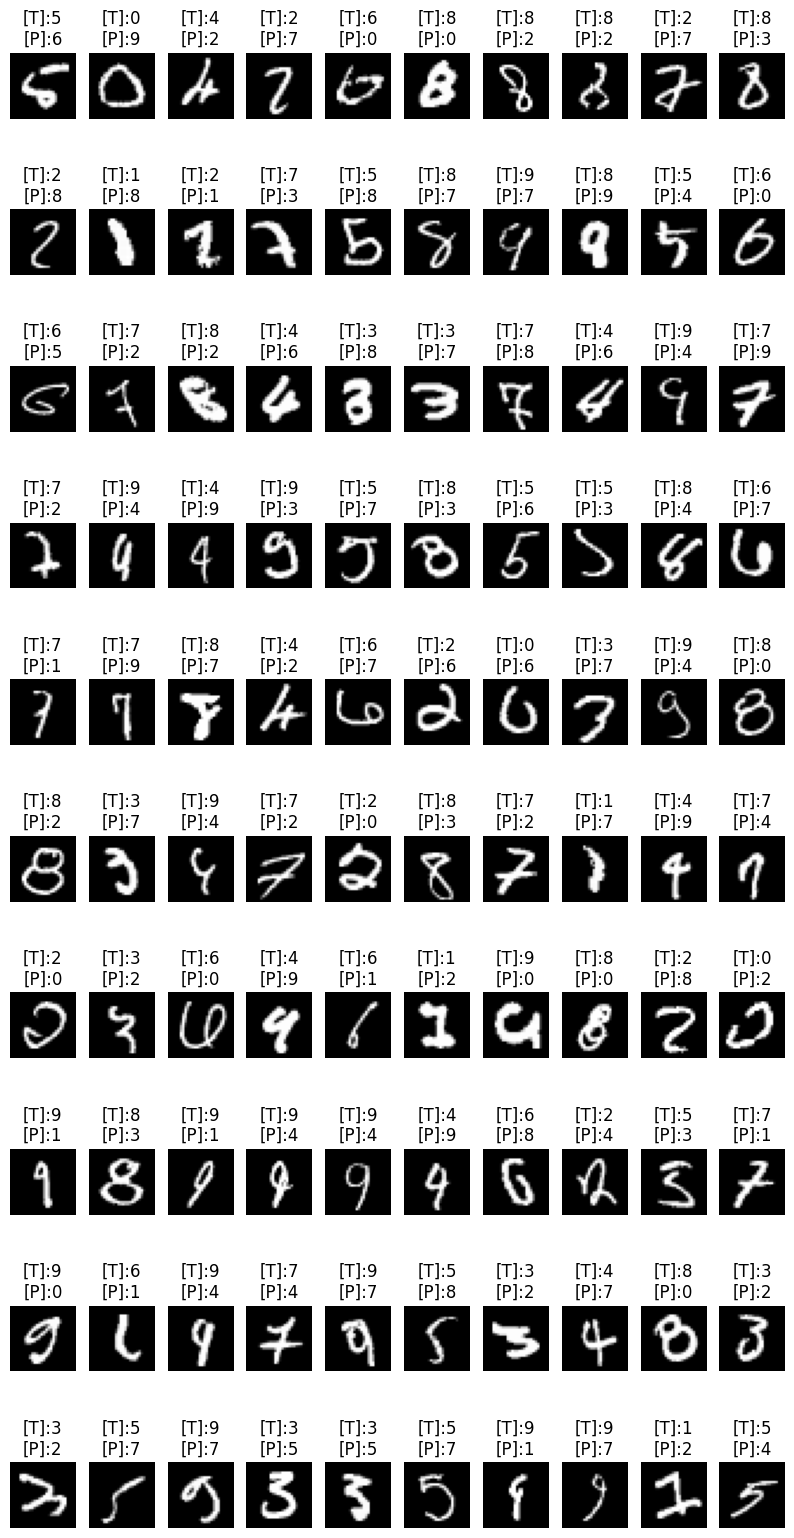

In [47]:
idx = np.nonzero(y_test != pre)[0]
idx = idx[:100]
plt.figure(figsize=(10, 20))
# 預測錯誤的預測值
fp_pred = pre[idx]
# 預測錯誤的真實值
fp_true = y_test[idx]
# 預測錯誤的圖片
fp_img = x_test[idx]
for i in range(len(idx)):  #len() 用于获取 idx 数组的长度，即预测错误的样本数量
    plt.subplot(10, 10, i+1)
    plt.axis("off")
    t = "[T]:{}\n[P]:{}".format(fp_true[i], fp_pred[i])
    plt.title(t)
    plt.imshow(fp_img[i], cmap="gray")

In [49]:

# 如果你不帶參數, 他會展開成為一個list, 把最大位置列出來
# 如果你帶入axis這個參數, axis=0, 直的看, 找最大值所在位置
#             axis=1(-1), 橫的看

np.array([
    [1, 3],
    [0.5, 2]
])

array([[1. , 3. ],
       [0.5, 2. ]])

1.这段代码的意义是将一个形状为 (28,28) 的二维 NumPy 数组 img_np 转换为一个一维数组，并将其归一化到 0 到 1 之间。

首先，img_np.reshape(1, 784) 将原始的二维数组转换为一个形状为 (1, 784) 的一维数组，其中 1 表示数组中只有一个样本（在这个例子中是一个手写数字图像），而 784 表示一个样本的特征数量，也就是图像的像素数


2.如果不将图像转换为 Numpy 数组，则无法对其进行处理和展示。PIL 库的 Image 类仅仅是用来打开和操作图像文件的对象，要在程序中进行图像处理或展示，需要将其转换为 Numpy 数组。








1/1 [==============================] - 0s 22ms/step
0 的機率是: 0.0002
1 的機率是: 0.1825
2 的機率是: 0.0046
3 的機率是: 0.0046
4 的機率是: 0.3521
5 的機率是: 0.0546
6 的機率是: 0.0036
7 的機率是: 0.304
8 的機率是: 0.0099
9 的機率是: 0.0838
最高機率是: 4


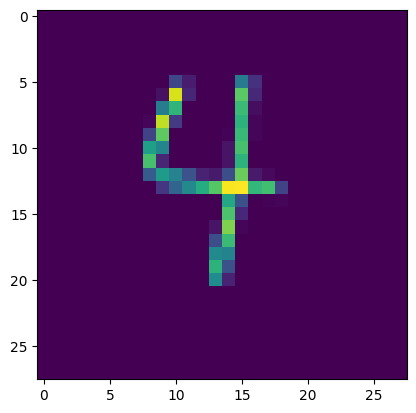

In [58]:
#convert("L") 用于将图像转换为灰度图像。转换为灰度图像是因为在手写数字识别任务中，图像中的颜色并不影响识别结果，只需要考虑图像中灰度信息的变化。
#可以使用#@param在代码块中定义一个参数，以便用户可以在运行代码块时提供文件名或路径。这样，代码块可以在不同的文件或路径上运行，而无需在代码中硬编码文件名或路径。
from PIL import Image#代码使用 PIL 库的 Image 类来打开指定文件名的图像文件
fn = "test.png" #@param {type:"string"}
img = Image.open(fn).resize((28, 28)).convert("L")
img_np = ray(imnp.arg)
#将二维数组转换为一维数组的目的是为了将图像数据展平
#需要将图像数据展平为一维数组即可，而不需要将其转换为一个三维数组
testx = img_np.reshape(1, 784) / 255.0
probas = model.predict(testx)[0]
for i in range(10):
    print(i, "的機率是:", round(probas[i], 4))#四舍五入到小数点后四位
ans = probas.argmax(axis=-1) #将沿着数组的最后一个维度进行计算，表示模型对输入图像进行分类时最有可能的数字
print("最高機率是:", ans)
plt.imshow(img_np)


In [32]:
#
# import math
# cases = [
#     (0.9999, 0.0001),
#     (0.5, 0.5),
#     (0.0001, 0.9999),
#     (0.6, 0.4)
# ]
# for q1, q2 in cases:
#     ce = 0.6 * math.log(1/q1, 2) + 0.4 * math.log(1/q2, 2)
#     print(q1, q2, "->", ce)